In [217]:
# iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# k-means clustering
from sklearn.cluster import KMeans
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
# make blobs
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np  

In [218]:
df = load_iris(as_frame=True)
X = df.data
y = df.target


In [219]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [220]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [223]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

d:\Conda\envs\insta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [224]:
kmeans.predict(X_test)

array([0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [225]:
knn.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

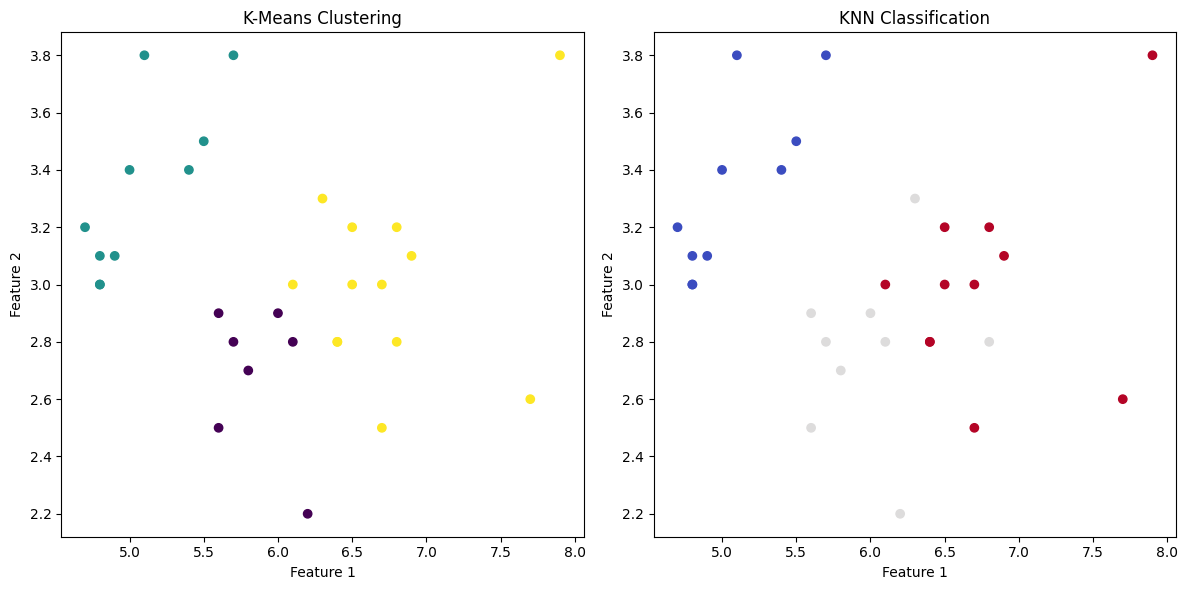

In [226]:
# two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)    )
ax1.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=kmeans.predict(X_test), cmap='viridis',)
ax2.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=knn.predict(X_test), cmap='coolwarm',)
ax1.set_title('K-Means Clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax2.set_title('KNN Classification')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
plt.tight_layout()
plt.show()



d:\Conda\envs\insta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Conda\envs\insta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Conda\envs\insta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Conda\envs\insta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

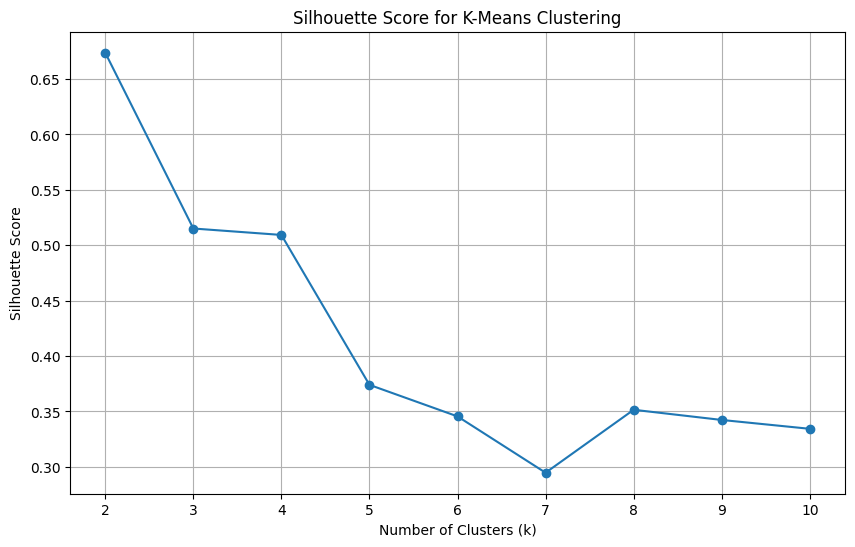

In [227]:
# checking which k is better in k-means
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')   
plt.title('Silhouette Score for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

d:\Conda\envs\insta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Conda\envs\insta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AB\AppData\Local\Temp\ipykernel_12596\916560778.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
C:\Users\AB\AppData\Local\Temp\ipykernel_12596\916560778.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are i

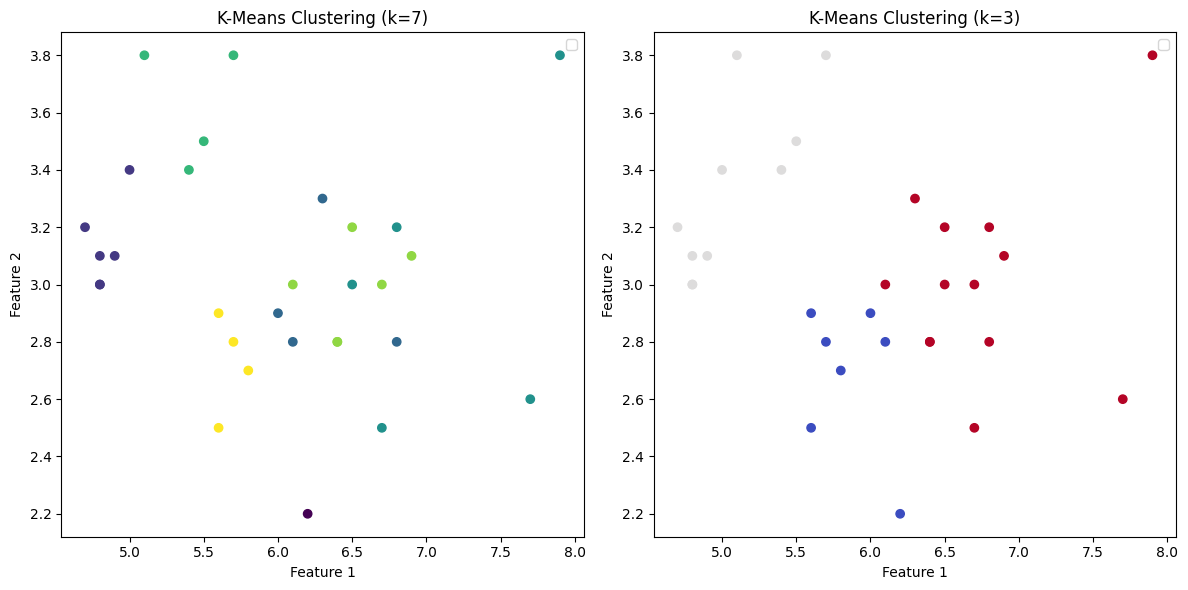

In [228]:
# k = 7
kmeans7 = KMeans(n_clusters=7, random_state=42)
kmeans7.fit(X_train)
kmeans7.predict(X_test)

kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(X_train)
kmeans3.predict(X_test)
# two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=kmeans7.predict(X_test), cmap='viridis',)
ax2.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=kmeans3.predict(X_test), cmap='coolwarm',)
ax1.set_title('K-Means Clustering (k=7)')
ax1.legend()
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax2.set_title('K-Means Clustering (k=3)')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend(loc = 'best')
plt.tight_layout()
plt.show()


d:\Conda\envs\insta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Conda\envs\insta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Conda\envs\insta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Conda\envs\insta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

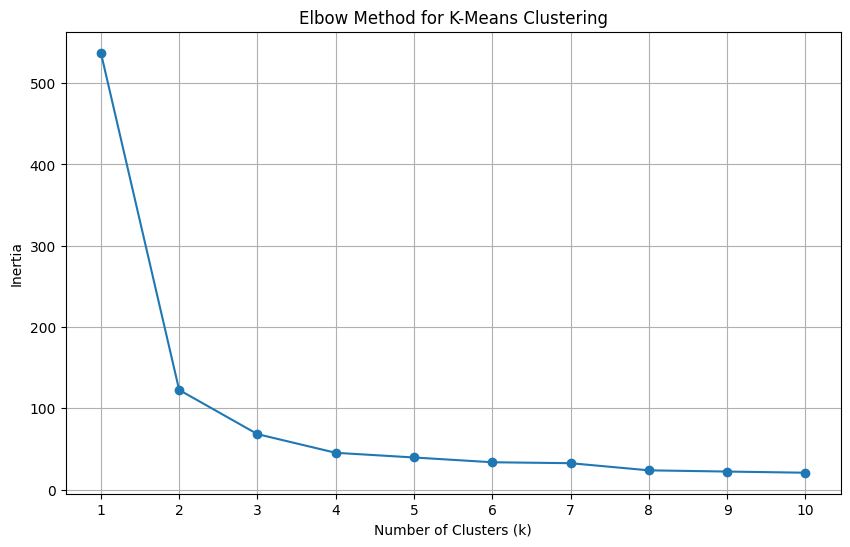

In [229]:
# elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


In [230]:
y_train.value_counts()

target
1    41
0    40
2    39
Name: count, dtype: int64

# Naive Bayes Classifier

In [231]:
# dataset for spam and not spam
from sklearn.datasets import fetch_openml
spam_data = fetch_openml('spambase', version=1, as_frame=True)
spam_df = spam_data.frame
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [232]:
X = spam_df.drop(columns=['class'])
y = spam_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=381)

In [233]:
# naive bayes classifier from scratch

class NaiveBayes:
    def __init__(self):
        self.class_priors = {} # to store prior probabilities of each class; 
        # prior probability is the probability of a class before observing any features
        # calculated as the number of instances of the class divided by the total number of instances
        # e.g. P(class) = count(class) / total_count
        self.feature_likelihoods = {}
        # to store likelihoods of features given each class;
        # likelihood is the probability of a feature given a class
        # calculated as the mean and standard deviation of the feature values for each class

    def fit(self, X, y):
        self.classes = np.unique(y) # unique classes in the target variable spam or not spam
        for cls in self.classes: # runs for each class i.e. spam and not spam
            X_cls = X[y == cls] # split the dataset into instances of the current class
            self.class_priors[cls] = len(X_cls) / len(X) # ratio of instances of the class to total instances
            # calculate the prior probability of the class
            # e.g. P(spam) = count(spam) / total_count

            # calculate the mean and standard deviation of each feature for the current class
            # these will be used to calculate the likelihood of the features given the class
            self.feature_likelihoods[cls] = (X_cls.mean(), X_cls.std())

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows(): # iterate over each row in the test set
            # row has the feature values for a single instance
            class_probs = {}
            for cls in self.classes:
                mean, std = self.feature_likelihoods[cls]
                likelihood = np.exp(-0.5 * ((row - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi)) # Gaussian likelihood for continuous features
                # likelihood is calculated using the Gaussian distribution formula
                class_probs[cls] = self.class_priors[cls] * likelihood.prod() 
            predictions.append(max(class_probs, key=class_probs.get))
        return np.array(predictions)
# Example usage


In [234]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)


In [235]:
# Display predictions and evaluate model
accuracy = accuracy_score(y_test, predictions)


In [236]:
# naive bayes from sklearn
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train, sample_weight=None)

,priors,None
,var_smoothing,1e-09


In [237]:
print(f"Scratch Accuracy and Report: {accuracy:.2f}")
print(classification_report(y_test, predictions))
gnb_predictions = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print(f"Accuracy and Report: {accuracy:.2f}")
print(classification_report(y_test, gnb_predictions))

Scratch Accuracy and Report: 0.77
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      2368
           1       0.64      0.92      0.76      1543

    accuracy                           0.77      3911
   macro avg       0.78      0.79      0.77      3911
weighted avg       0.81      0.77      0.77      3911

Accuracy and Report: 0.77
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2368
           1       0.71      0.94      0.81      1543

    accuracy                           0.82      3911
   macro avg       0.83      0.84      0.82      3911
weighted avg       0.85      0.82      0.82      3911



In [238]:
# dataset categorical for naive bayes from scratch
from sklearn.datasets import fetch_openml
categorical_data = fetch_openml('adult', version=2, as_frame=True)
df = categorical_data.frame
# Display first few rows of the categorical dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [239]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [240]:
# dummies for class
df['class'] = df['class'].map({'<=50K': 0, '>50K': 1})


In [241]:
# # using correlation matrix to find features that are highly correlated
# correlation_matrix = df.corr()
# # Display the correlation matrix
# plt.figure(figsize=(12, 8))
# plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
# plt.colorbar()
# plt.title('Correlation Matrix')
# plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
# plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
# plt.tight_layout()
# plt.show()

In [242]:
# count values for all columns
for col in df.columns:
    print(f"{col}: {df[col].nunique()}\t")

age: 74	
workclass: 8	
fnlwgt: 28523	
education: 16	
education-num: 16	
marital-status: 7	
occupation: 14	
relationship: 6	
race: 5	
sex: 2	
capital-gain: 123	
capital-loss: 99	
hours-per-week: 96	
native-country: 41	
class: 2	


In [243]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [244]:
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()
categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

In [245]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [246]:
# drop native country column from df
df.drop(columns='native-country', inplace=True)



In [247]:
# one hot encode categorical columns
# exclude nativ-country from list categorical_cols - ['native-country']
categorical_cols.remove('native-country')  # remove 'native-country' from the list
categorical_cols.remove('class')  # remove 'class' from the list as it is the target variable
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,226802,7,0,0,40,0,False,False,True,...,False,False,True,False,False,False,True,False,False,True
1,38,89814,9,0,0,50,0,False,False,True,...,False,False,False,False,False,False,False,False,True,True
2,28,336951,12,0,0,40,1,True,False,False,...,False,False,False,False,False,False,False,False,True,True
3,44,160323,10,7688,0,40,1,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,103497,10,0,0,30,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [253]:
df_cat = df.select_dtypes(include=['bool']).copy()
df_cat.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,True
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [254]:
df_cat.shape

(48842, 51)

In [255]:
class NaiveBayes:
    def __init__(self):
        self.class_priors = {}  # P(class)
        self.feature_likelihoods = {}  # P(feature=1 | class)

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            X_cls = X[y == cls]  # rows where y == current class
            self.class_priors[cls] = len(X_cls) / len(X)

            # Calculate likelihood P(feature_i = 1 | class)
            # Add Laplace smoothing to avoid zero probability
            likelihood = (X_cls.sum() + 1) / (len(X_cls) + 2)
            self.feature_likelihoods[cls] = likelihood

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            class_probs = {}
            for cls in self.classes:
                likelihood = self.feature_likelihoods[cls]
                # Bernoulli likelihood: P(x|y) = p^x * (1-p)^(1-x)
                prob = np.prod(
                    row * likelihood + (1 - row) * (1 - likelihood)
                )
                class_probs[cls] = self.class_priors[cls] * prob

            # Choose class with max probability
            predictions.append(max(class_probs, key=class_probs.get))
        return np.array(predictions)


In [256]:
X_train, X_test, y_train, y_test = train_test_split(df_cat, df['class'], test_size=0.85, random_state=381)

In [261]:
nb_cat = NaiveBayes()
nb_cat.fit(df_cat, df['class'])
nb_cat_predictions = nb_cat.predict(X_test)
# Display predictions and evaluate model
accuracy = accuracy_score(y_test, nb_cat_predictions)


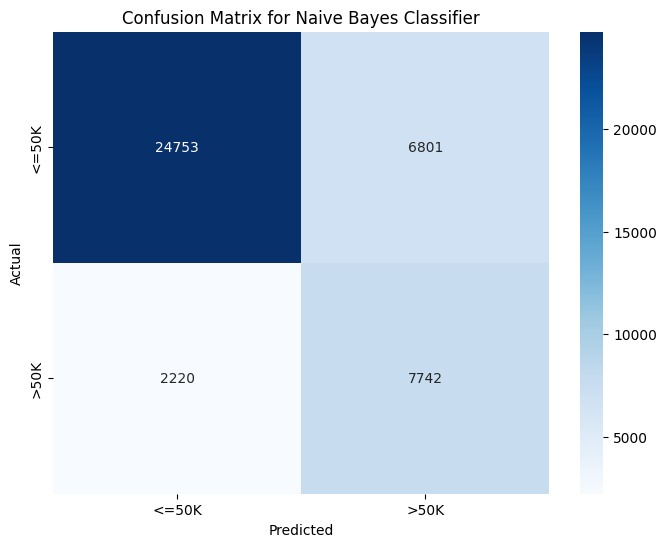

In [267]:

import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, nb_cat_predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()




In [268]:

print("Accuracy: ", accuracy)
print(classification_report(y_test, nb_cat_predictions))





Accuracy:  0.7781578186723191
              precision    recall  f1-score   support

           0       0.92      0.78      0.85     31554
           1       0.53      0.78      0.63      9962

    accuracy                           0.78     41516
   macro avg       0.73      0.78      0.74     41516
weighted avg       0.83      0.78      0.79     41516



In [269]:
# nb from sklearn
from sklearn.naive_bayes import BernoulliNB
nb_sklearn = BernoulliNB()
nb_sklearn.fit(X_train, y_train)
nb_sklearn_predictions = nb_sklearn.predict(X_test)
# Display predictions and evaluate model
accuracy = accuracy_score(y_test, nb_sklearn_predictions)
print("Accuracy: ", accuracy)
print(classification_report(y_test, nb_sklearn_predictions))


Accuracy:  0.7781578186723191
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     31554
           1       0.53      0.78      0.63      9962

    accuracy                           0.78     41516
   macro avg       0.72      0.78      0.74     41516
weighted avg       0.82      0.78      0.79     41516



In [270]:
# gaussian nb
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train, sample_weight=None)
# Display predictions and evaluate model
gnb_predictions = gnb.predict(X_test)
accuracy = accuracy_score(y_test, gnb_predictions)
print("Accuracy: ", accuracy)
print(classification_report(y_test, gnb_predictions))

Accuracy:  0.7057038250313132
              precision    recall  f1-score   support

           0       0.94      0.65      0.77     31554
           1       0.44      0.87      0.59      9962

    accuracy                           0.71     41516
   macro avg       0.69      0.76      0.68     41516
weighted avg       0.82      0.71      0.73     41516

